# Generate a world-wide grid, and the features for each point

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import jusipy

In [3]:
GLCF = jusipy.latlong_features.GLCF(resolution='8km')
CLL = jusipy.GIS.CountryLatLong()

Loading GLCF(8km)                                                                                                    

## Generate the grid

In [4]:
# Generate the grid
land_grid = pd.DataFrame(jusipy.GIS.sample.grid_latlong(land=True, glcf=GLCF, lat_points=500),
                         columns=['lat', 'long'])

# Attach the country in which the point lies
land_grid_countries = CLL.get(list(land_grid.values))
land_grid['country'] = land_grid_countries

# Remove points without a country
land_grid_wrong = land_grid[pd.isna(land_grid.country)]
land_grid = land_grid[~pd.isna(land_grid.country)]



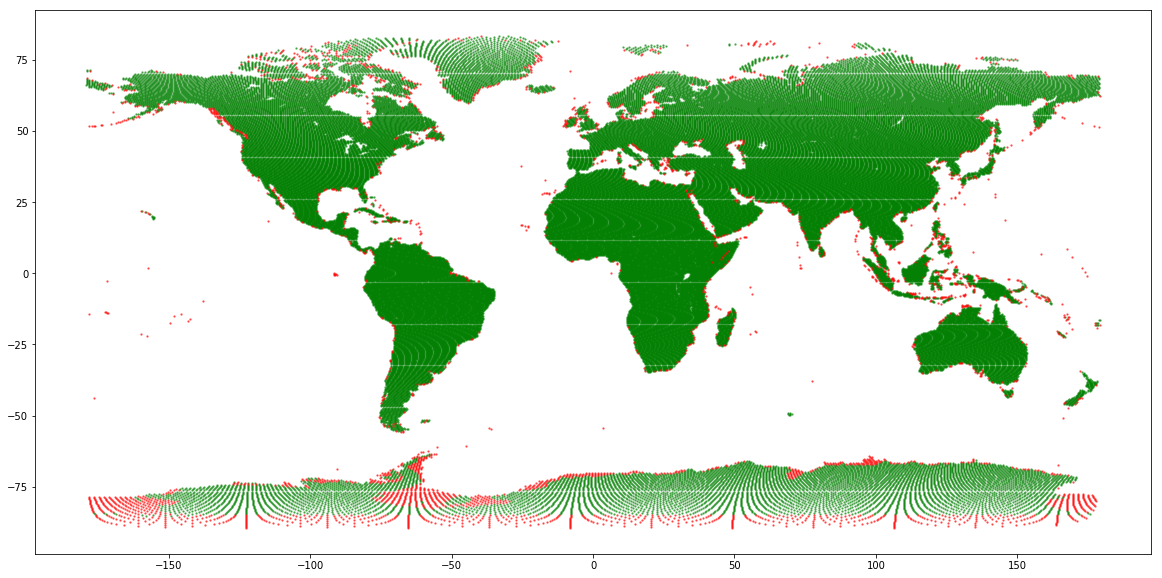

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(land_grid.long, land_grid.lat, s=2, c='g', alpha=0.5, zorder=1)
plt.scatter(land_grid_wrong.long, land_grid_wrong.lat, s=2, c='r', alpha=0.5, zorder=2)

## Collect the features

In [30]:
# Load features
#A_latlong = jusipy.latlong_features.All()
#A_country = jusipy.country_features.All()

# Get features for each point in grid
country_features = jusipy.country_features.get(land_grid, A_country, fuzzy=50)
#latlong_features = jusipy.latlong_features.get(land_grid, A_latlong, pixel_window=10)

# Remove features we can't use...
#latlong_features = latlong_features.drop(columns=['coding_error_do_not_use_feature'])

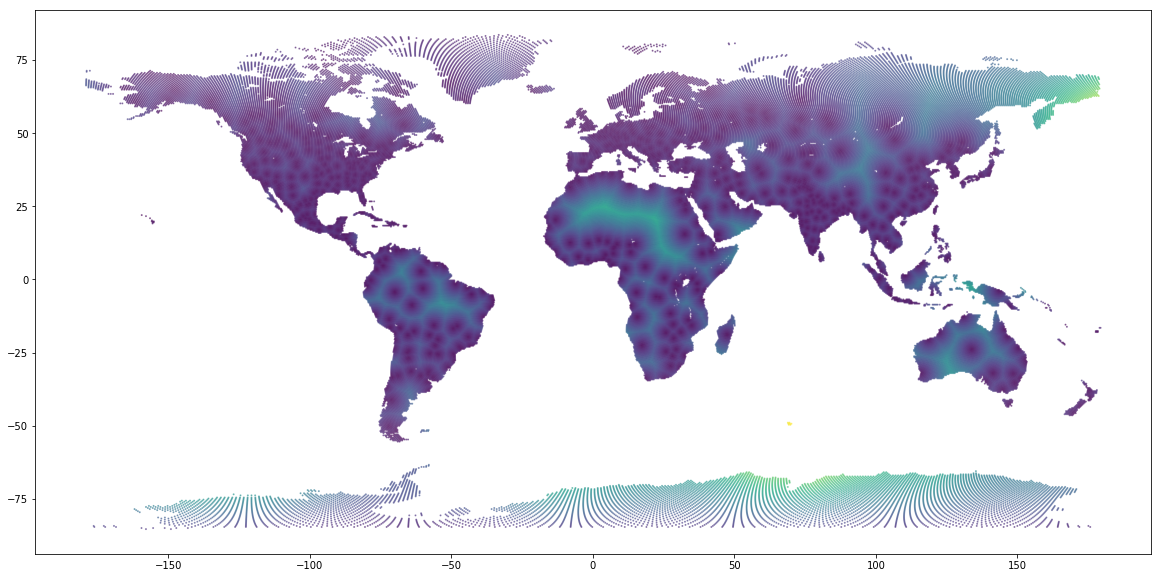

In [86]:
plt.figure(figsize=(20,10))
C = [ 100 if pd.isna(v) else 100-v for v in country_features['TI_CPI__TI_CPI_CPISN'].values ]
#C = [ 0 if pd.isna(v) else v for v in country_features['WB_SD__SL_TLF_ACTI_MA_ZS'].values ]
plt.scatter(land_grid.long, land_grid.lat, s=1, c=latlong_features.nearest_airport.values, alpha=0.5)
#plt.colorbar(cb)
#plt.xlim([-10,20])
#plt.ylim([30,60])

## Store the grid and features

In [11]:
# Store the grid
land_grid.to_pickle('data/grid_500.pkl')
# Store the features
latlong_features.to_pickle('data/grid_500_latlong_features.pkl')

In [44]:
print(list(sorted(country_features.columns)))

['LMM_LSIC__LMM_LSIC_10CL', 'LMM_LSIC__LMM_LSIC_10IP', 'LMM_LSIC__LMM_LSIC_11AVCL', 'LMM_LSIC__LMM_LSIC_11AVIP', 'LMM_LSIC__LMM_LSIC_1CL', 'LMM_LSIC__LMM_LSIC_1IP', 'LMM_LSIC__LMM_LSIC_2CL', 'LMM_LSIC__LMM_LSIC_2IP', 'LMM_LSIC__LMM_LSIC_3CL', 'LMM_LSIC__LMM_LSIC_3IP', 'LMM_LSIC__LMM_LSIC_4CL', 'LMM_LSIC__LMM_LSIC_4IP', 'LMM_LSIC__LMM_LSIC_5CL', 'LMM_LSIC__LMM_LSIC_5IP', 'LMM_LSIC__LMM_LSIC_6CL', 'LMM_LSIC__LMM_LSIC_6IP', 'LMM_LSIC__LMM_LSIC_7CL', 'LMM_LSIC__LMM_LSIC_7IP', 'LMM_LSIC__LMM_LSIC_8CL', 'LMM_LSIC__LMM_LSIC_8IP', 'LMM_LSIC__LMM_LSIC_9CL', 'LMM_LSIC__LMM_LSIC_9IP', 'LMM_PICL__LMM_PICL_1TOT', 'LMM_PICL__LMM_PICL_2FR', 'LMM_PICL__LMM_PICL_3NFR', 'TI_CPI__TI_CPI_CPIRN', 'TI_CPI__TI_CPI_CPIRO', 'TI_CPI__TI_CPI_CPISN', 'TI_CPI__TI_CPI_CPISO', 'WB_ARD__AG_AGR_TRAC_NO', 'WB_ARD__AG_CON_FERT_PT_ZS', 'WB_ARD__AG_CON_FERT_ZS', 'WB_ARD__AG_LND_AGRI_K2', 'WB_ARD__AG_LND_AGRI_ZS', 'WB_ARD__AG_LND_ARBL_HA', 'WB_ARD__AG_LND_ARBL_HA_PC', 'WB_ARD__AG_LND_ARBL_ZS', 'WB_ARD__AG_LND_CREL_HA', 'WB

In [52]:
set([ c  for (c,v) in zip(land_grid.country, country_features['TI_CPI__TI_CPI_CPISN']) if pd.isna(v) ])

{'ATA', 'ATF', 'BLZ', 'CS-KM', 'ESH', 'FJI', 'FLK', 'GRL', 'GUF', 'NCL', 'PSE'}

In [54]:
CF_nonredundant = country_features.drop_duplicates()

In [56]:
nac = { c : len(CF_nonredundant[c].values[pd.isna(CF_nonredundant[c])]) for c in CF_nonredundant.columns }
dict(sorted(nac.items(), key=lambda x:x[1]))

{'WB_ARD__AG_LND_AGRI_K2': 4,
 'WB_ARD__AG_LND_FRST_K2': 4,
 'WB_ARD__AG_SRF_TOTL_K2': 4,
 'WB_ARD__EG_ELC_ACCS_RU_ZS': 4,
 'WB_ARD__EN_ATM_METH_AG_KT_CE': 4,
 'WB_ARD__EN_ATM_NOXE_AG_KT_CE': 4,
 'WB_ARD__SP_RUR_TOTL': 4,
 'WB_ARD__SP_RUR_TOTL_ZG': 4,
 'WB_ARD__SP_RUR_TOTL_ZS': 4,
 'WB_SD__SP_DYN_LE00_FE_IN': 4,
 'WB_SD__SP_DYN_LE00_MA_IN': 4,
 'WB_SE__WB_NY_GDP_MKTP_KD_ZG': 5,
 'WB_ARD__AG_LND_AGRI_ZS': 5,
 'WB_ARD__AG_LND_ARBL_HA': 5,
 'WB_ARD__AG_LND_ARBL_HA_PC': 5,
 'WB_ARD__AG_LND_ARBL_ZS': 5,
 'WB_ARD__AG_LND_FRST_ZS': 5,
 'WB_ARD__AG_LND_TOTL_K2': 5,
 'WB_ARD__AG_PRD_FOOD_XD': 5,
 'WB_ARD__AG_PRD_LVSK_XD': 5,
 'WB_ARD__SL_AGR_EMPL_FE_ZS': 5,
 'WB_ARD__SL_AGR_EMPL_MA_ZS': 5,
 'WB_ARD__SL_AGR_EMPL_ZS': 5,
 'WB_SPL__SL_AGR_EMPL_FE_ZS': 5,
 'WB_SPL__SL_AGR_EMPL_MA_ZS': 5,
 'WB_SPL__SL_AGR_EMPL_ZS': 5,
 'WB_SPL__SL_EMP_1524_SP_FE_ZS': 5,
 'WB_SPL__SL_EMP_1524_SP_MA_ZS': 5,
 'WB_SPL__SL_EMP_1524_SP_ZS': 5,
 'WB_SPL__SL_EMP_MPYR_FE_ZS': 5,
 'WB_SPL__SL_EMP_MPYR_MA_ZS': 5,
 'WB_SPL__SL_

In [70]:
A_country.description['WB_SD__SL_TLF_ACTI_FE_ZS']

'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)'

In [83]:
latlong_features

,nearest_airport,nearest_port,nearest_roads,nearest_railroad,nearest_urban_area,Water,Broadleaf Evergreen Forest,Coniferous Evergreen Forest and Woodland,High latitude Deciduous Forest and Woodland,Tundra,...,Mixed Forest,Woodland,Wooded Grassland2,Closed Shrubland,Open Shrubland,Grassland2,Cropland,Bare Ground2,Permanent snow and ice,distance_to_mine
index,,,,,,,,,,,,,,,,,,,,,
476,2.269985,2.417112,3.186856,3.256921,3.274081,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,2.514181
478,2.300315,2.398954,2.901394,2.968651,2.987310,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,2.492735
556,2.490059,2.661822,3.568372,3.646451,3.664967,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,2.769422
557,2.495916,2.643225,3.420695,3.497488,3.516714,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,2.749504
558,2.511976,2.634238,3.274179,3.349547,3.369538,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,2.738808
559,2.538045,2.634958,3.128989,3.202768,3.223588,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,2.737443
560,2.573819,2.645377,2.985115,3.057321,3.079038,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,2.745421
638,2.712180,3.019511,4.526041,4.665120,4.598867,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,3.208266
639,2.714437,3.011203,4.419900,4.509361,4.527404,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,3.151852


In [84]:
land_grid

,lat,long,country
476,-85.32,-157.938638,ATA
478,-85.32,-149.114094,ATA
556,-84.96,-159.510808,ATA
557,-84.96,-155.412970,ATA
558,-84.96,-151.315132,ATA
559,-84.96,-147.217293,ATA
560,-84.96,-143.119455,ATA
638,-84.60,-176.174621,ATA
639,-84.60,-172.349241,ATA
640,-84.60,-168.523862,ATA
